<a href="https://colab.research.google.com/github/wildhugecoconut/Titanic-Kaggle-competition/blob/main/Jaume_ML3_TITANIC_Kaggle_competition_(TO_DO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/titanic_train.csv',index_col=0)

In [ ]:
print(df.shape)

(891, 11)


In [ ]:
df.head(18)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
df[df["Ticket"].duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


# ML Preprocessing

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Data cleaning

In [ ]:
del(df["Ticket"])

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df["Name"]=df["Name"].str.len()


In [ ]:
df["Cabin_level"]=df["Cabin"].str[0]


In [ ]:
del(df["Cabin"])

<Axes: >

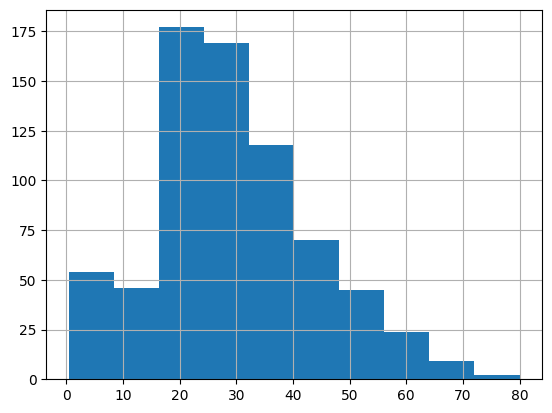

In [ ]:
df["Age"].hist()

## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df["Age"].fillna(-999,inplace=True)

In [ ]:
df.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
Cabin_level    687
dtype: int64

Analisis de las distribuciones de las variables.

EDA

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
len(df[df.duplicated()])

19

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df["Survived"].isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_level
PassengerId,,,,,,,,,,


## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['Sex', 'Embarked', 'Cabin_level']


In [ ]:
df = pd.get_dummies(df, columns=categories)

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [ ]:
target="Survived"

In [ ]:
features = [i for i in df.columns if i != target]

In [ ]:
y = df[target]
X = df[features]

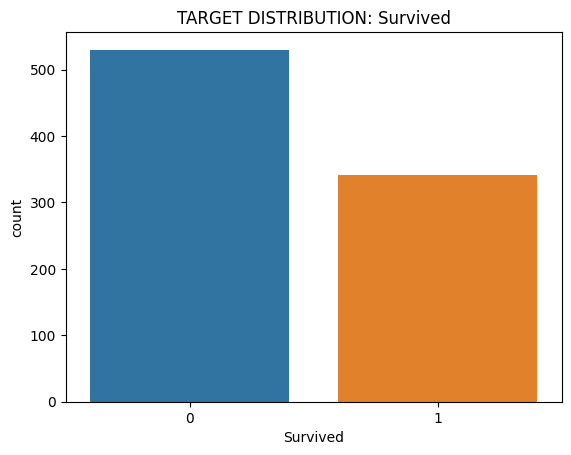

In [ ]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
...

Ellipsis

In [ ]:
...

Ellipsis

In [ ]:
...

Ellipsis

## Eliminar alta correlación

In [ ]:
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Sex_male,Sex_female,1.0,0.5375,0.5375,Sex_female


In [ ]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
X.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['Sex_female']


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
...

Ellipsis

## Eliminar mínima varianza

In [ ]:
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

2  low variance features were removed:
 ['Cabin_level_G', 'Cabin_level_T']


In [ ]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_level_A,Cabin_level_B,Cabin_level_C,Cabin_level_D,Cabin_level_E,Cabin_level_F,Cabin_level_G,Cabin_level_T
Survived,1.000000,-0.329926,0.323679,0.062853,-0.038257,0.076600,0.252483,0.537500,-0.537500,0.166889,0.008235,-0.157822,0.020178,0.172314,0.110913,0.148415,0.143034,0.056234,0.014988,-0.027219
Pclass,-0.329926,1.000000,-0.208951,-0.158733,0.087201,0.024264,-0.547864,-0.121196,0.121196,-0.243562,0.221751,0.083444,-0.204254,-0.368499,-0.415906,-0.277524,-0.228604,0.013186,0.057091,-0.052313
Name,0.323679,-0.208951,1.000000,0.132680,0.165693,0.248253,0.149526,0.442319,-0.442319,0.025945,-0.140255,0.062957,0.039021,0.080916,0.131414,0.056816,0.016439,0.018721,0.075722,0.003195
Age,0.062853,-0.158733,0.132680,1.000000,-0.029706,0.111001,0.091574,0.025637,-0.025637,-0.040756,-0.344984,0.247748,-0.001627,0.089860,0.037034,0.067280,0.064830,0.006863,0.029611,0.017353
SibSp,-0.038257,0.087201,0.165693,-0.029706,1.000000,0.408444,0.154055,0.117161,-0.117161,-0.059884,-0.022307,0.068873,-0.047905,-0.036063,0.029579,-0.018505,-0.038363,0.001504,-0.001582,-0.016443
Parch,0.076600,0.024264,0.248253,0.111001,0.408444,1.000000,0.211359,0.242519,-0.242519,-0.012050,-0.079618,0.062565,-0.041501,0.055019,0.028900,-0.020694,-0.018086,0.022893,0.072220,-0.016202
Fare,0.252483,-0.547864,0.149526,0.091574,0.154055,0.211359,1.000000,0.177110,-0.177110,0.270511,-0.116535,-0.169489,0.018404,0.385428,0.363156,0.097389,0.052112,-0.034309,-0.025868,0.001922
Sex_female,0.537500,-0.121196,0.442319,0.025637,0.117161,0.242519,0.177110,1.000000,-1.000000,0.080476,0.080182,-0.127288,-0.080870,0.106594,0.054737,0.076583,0.044181,0.006285,0.090495,-0.025418
Sex_male,-0.537500,0.121196,-0.442319,-0.025637,-0.117161,-0.242519,-0.177110,-1.000000,1.000000,-0.080476,-0.080182,0.127288,0.080870,-0.106594,-0.054737,-0.076583,-0.044181,-0.006285,-0.090495,0.025418
Embarked_C,0.166889,-0.243562,0.025945,-0.040756,-0.059884,-0.012050,0.270511,0.080476,-0.080476,1.000000,-0.147661,-0.782374,0.093110,0.168844,0.113608,0.102838,-0.016962,-0.035548,-0.032917,-0.016430


# Split X-y

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_level_A', 'Cabin_level_B', 'Cabin_level_C', 'Cabin_level_D', 'Cabin_level_E', 'Cabin_level_F', 'Cabin_level_G', 'Cabin_level_T']


# Target distribution

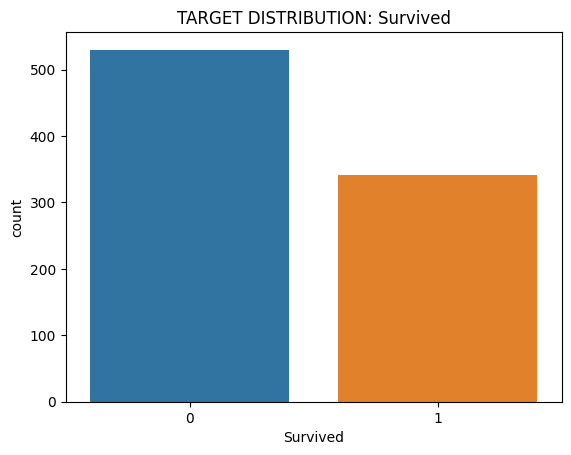

In [ ]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
'''
X_train = X
y_train = y
'''

'\nX_train = X\ny_train = y\n'

In [ ]:
''''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
'''

"'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)\n"

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X)


X_train_std = pd.DataFrame(X_train_std, columns = X.columns, index= X.index)


In [ ]:
X_train_std.head(3)

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_level_A,Cabin_level_B,Cabin_level_C,Cabin_level_D,Cabin_level_E,Cabin_level_F
PassengerId,,,,,,,,,,,,,,,,
1,0.841000,-0.443147,0.454402,0.438667,-0.478174,-0.507522,0.750149,-0.484899,-0.304519,0.619780,-0.132299,-0.238683,-0.269390,-0.198324,-0.19518,-0.12302
2,-1.543885,2.566556,0.494562,0.438667,-0.478174,0.771467,-1.333068,2.062283,-0.304519,-1.613476,-0.132299,-0.238683,3.712097,-0.198324,-0.19518,-0.12302
3,0.841000,-0.550637,0.464442,-0.485288,-0.478174,-0.494040,-1.333068,-0.484899,-0.304519,0.619780,-0.132299,-0.238683,-0.269390,-0.198324,-0.19518,-0.12302


# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()  # declara el algoritmo del modelo ML -> Algoritmo ML + Datos = Modelo ML

In [ ]:
model.fit(X, y)

GradientBoostingClassifier()

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [ ]:
from sklearn.linear_model import LogisticRegression

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
evaluate_classification(model = LogisticRegression(),
                    X=X_train_std,y=y)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.851288,0.835731


In [ ]:
evaluate_classification(model =RandomForestClassifier(),
                    X=X_train_std,y=y)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999975,0.851461
0,LogisticRegression(),0.851288,0.835731


In [ ]:
evaluate_classification(model=SVC(probability=True), X=X_train_std, y=y)


,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999975,0.851461
2,SVC(probability=True),0.885250,0.846041
0,LogisticRegression(),0.851288,0.835731


In [ ]:
X_train_std.shape

(872, 16)

In [ ]:
y.shape

(872,)

In [ ]:
evaluate_classification(model =XGBClassifier(),
                    X=X_train_std,y=y)

,Model,AUC Train,AUC Cross-Valida
3,"XGBClassifier(base_score=None, booster=None, c...",0.999600,0.853481
1,RandomForestClassifier(),0.999975,0.851461
2,SVC(probability=True),0.885250,0.846041
0,LogisticRegression(),0.851288,0.835731


In [ ]:
evaluate_classification(model = GradientBoostingClassifier(),
                    X=X_train_std,y=y)

,Model,AUC Train,AUC Cross-Valida
4,GradientBoostingClassifier(),0.944949,0.854697
3,"XGBClassifier(base_score=None, booster=None, c...",0.999600,0.853481
1,RandomForestClassifier(),0.999975,0.851461
2,SVC(probability=True),0.885250,0.846041
0,LogisticRegression(),0.851288,0.835731


In [ ]:
!pip install lightgbm


In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
evaluate_classification(model = LGBMClassifier(),
                    X=X_train_std,y=y)

,Model,AUC Train,AUC Cross-Valida
5,LGBMClassifier(),0.998483,0.857284
4,GradientBoostingClassifier(),0.944949,0.854697
3,"XGBClassifier(base_score=None, booster=None, c...",0.999600,0.853481
1,RandomForestClassifier(),0.999975,0.851461
2,SVC(probability=True),0.885250,0.846041
0,LogisticRegression(),0.851288,0.835731


## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

num_leaves: Número máximo de hojas en un árbol.
learning_rate: Tasa de aprendizaje para los árboles.
n_estimators: Número de árboles en el modelo.
max_depth: Profundidad máxima de un árbol.
subsample: Proporción de muestras utilizadas para entrenar cada árbol.
colsample_bytree: Proporción de características utilizadas para entrenar cada árbol.

In [ ]:
parameters = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [30, 50, 70, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [ ]:
search_hp = RandomizedSearchCV(estimator=LGBMClassifier(),
                               param_distributions=parameters,
                               scoring='roc_auc',
                               cv=5, n_iter=200, n_jobs=-1, verbose=True)

In [ ]:
search_hp.fit(X, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [30, 50, 70, 100, 200],
                                        'num_leaves': [20, 30, 40],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(colsample_bytree=0.9, max_depth=5, num_leaves=40)

 The best AUC: 0.8670788495874151

 The best parameters across ALL searched params:
 {'subsample': 1.0, 'num_leaves': 40, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search_hp.best_estimator_

In [ ]:
best_model

LGBMClassifier(colsample_bytree=0.9, max_depth=5, num_leaves=40)

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
df.shape

(872, 20)

In [ ]:
x_pred=pd.read_csv("/content/drive/MyDrive/machine learning/titanic_test.csv",index_col=0)
x_pred.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
x_pred.shape

(418, 10)

## Model features

In [ ]:
features_model=list(best_model.feature_name_)

In [ ]:
features_model

['Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_level_A',
 'Cabin_level_B',
 'Cabin_level_C',
 'Cabin_level_D',
 'Cabin_level_E',
 'Cabin_level_F']

## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
x_pred

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
del(x_pred["Ticket"])
x_pred["Name"]=x_pred["Name"].str.len()
x_pred["Cabin_level"]=x_pred["Cabin"].str[0]
del(x_pred["Cabin"])
x_pred["Age"].fillna(-999,inplace=True)

In [ ]:
x_pred

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_level
PassengerId,,,,,,,,,
892,3,16,male,34.5,0,0,7.8292,Q,NaN
893,3,32,female,47.0,1,0,7.0000,S,NaN
894,2,25,male,62.0,0,0,9.6875,Q,NaN
895,3,16,male,27.0,0,0,8.6625,S,NaN
896,3,44,female,22.0,1,1,12.2875,S,NaN
...,...,...,...,...,...,...,...,...,...
1305,3,18,male,-999.0,0,0,8.0500,S,NaN
1306,1,28,female,39.0,0,0,108.9000,C,C
1307,3,28,male,38.5,0,0,7.2500,S,NaN


In [ ]:
categories = list(x_pred.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)
x_pred= pd.get_dummies(x_pred, columns=categories)

Variables categoricas a encodear: ['Sex', 'Embarked', 'Cabin_level']


In [ ]:
x_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Name           418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           417 non-null    float64
 6   Sex_female     418 non-null    uint8  
 7   Sex_male       418 non-null    uint8  
 8   Embarked_C     418 non-null    uint8  
 9   Embarked_Q     418 non-null    uint8  
 10  Embarked_S     418 non-null    uint8  
 11  Cabin_level_A  418 non-null    uint8  
 12  Cabin_level_B  418 non-null    uint8  
 13  Cabin_level_C  418 non-null    uint8  
 14  Cabin_level_D  418 non-null    uint8  
 15  Cabin_level_E  418 non-null    uint8  
 16  Cabin_level_F  418 non-null    uint8  
 17  Cabin_level_G  418 non-null    uint8  
dtypes: floa

In [ ]:
print(df.shape)
print(x_pred.shape)


(872, 20)
(418, 18)


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(x_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 18
Variables en modelos: 16
¿Match?: False


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 []


In [ ]:
for col in missing_features:
  x_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 ['Sex_female', 'Cabin_level_G']


In [ ]:
x_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(x_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 16
Variables en modelos: 16
¿Match?: True


In [ ]:
# Reordena variables
x_pred = x_pred[features_model]


In [ ]:
X_pred.shape

(418, 16)

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
'''
x_pred_std=x_pred
scaler = StandardScaler()


x_pred_std= scaler.fit_transform(X)


x_pred_std = pd.DataFrame(x_pred_std, columns = X.columns, index= X.index)
'''


## Predictions

In [ ]:
predictions =best_model.predict(x_pred)

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = x_pred.index)

In [ ]:
submission.to_csv('/content/drive/MyDrive/machine learning/predictions.csv')

In [ ]:
best_model.predict(x_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,